# Lasso Regression Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("bikes_rent.csv", sep=',')
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


## Bike Sharing Dataset Data Set 

#### Data Set Information:
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

#### Attribute Information:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users

#### Target variable:
- cnt: count of total rental bikes including both casual and registered

We have real, binary and nominal variables. So, all of them we can be interpretered as real variables. Let's look at the charts, how the target attribute depends on the rest variables.

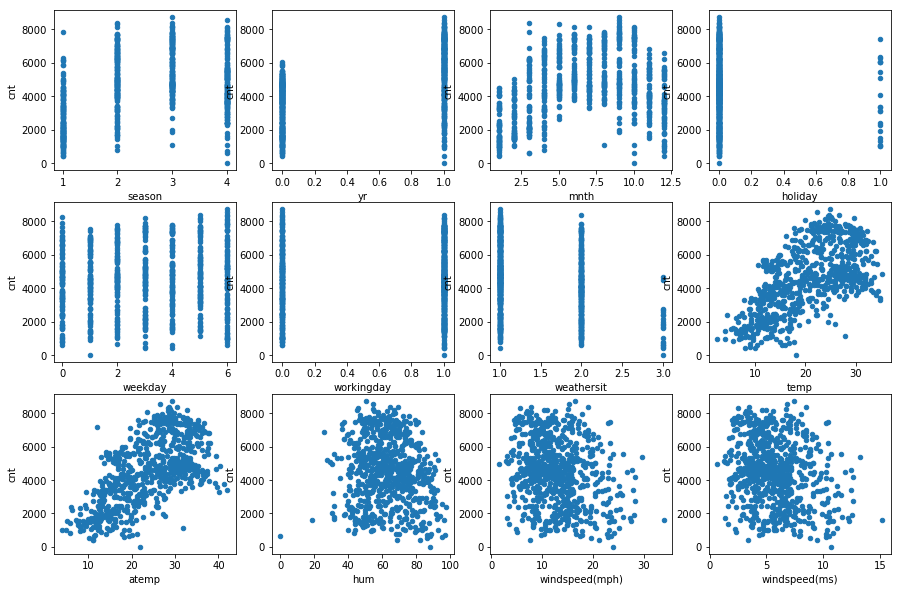

In [18]:

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

In [40]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

y = df['cnt']
X = df.copy()
del X['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
# specify the lasso regression model
from sklearn.linear_model import LassoLarsCV

model = LassoLarsCV(cv=10, precompute=False).fit(X_train, y_train)

In [42]:
dict(zip(X.columns, model.coef_))

{'atemp': 84.295378369193131,
 'holiday': -459.86006246865037,
 'hum': -11.434835082550373,
 'mnth': -37.350828980091883,
 'season': 509.95858594986902,
 'temp': 36.745238193872233,
 'weathersit': -652.06720971877724,
 'weekday': 71.714023411031746,
 'windspeed(mph)': 0.0,
 'windspeed(ms)': -91.699259316277463,
 'workingday': 183.16760444597298,
 'yr': 1976.4187989099187}

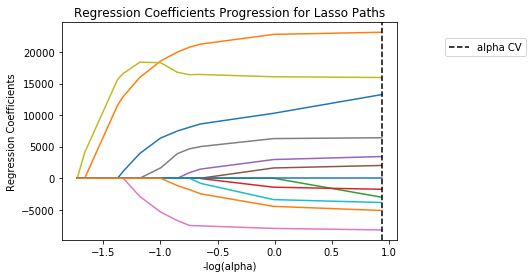

In [43]:
# plot coefficient progression
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))

plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

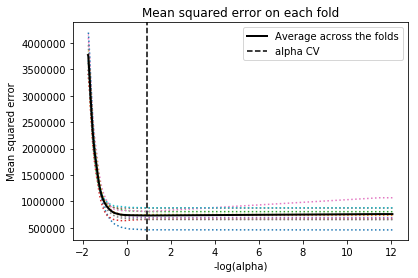

In [44]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [45]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
694636.052845
test data MSE
927271.395009


In [46]:
# R-square from training and test data
rsquared_train=model.score(X_train, y_train)
rsquared_test=model.score(X_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.814960517668
test data R-square
0.750013984671


Lasso is an acronym for Least Absolute Selection Shrinkage Operator. Lasso Regression is a supervised machine learning method. Shrinking the regression coefficients can reduce variance without a substantial increase in bias and increase model interpretability. 
Our example represented that windspeed(mph) is not important for the model, this result is quite obvious, because this variable provides no additional information, as windspeed(ms) is already provided.

This method gave a good result (75% of R-squared) on the test set, but we should carefully use it on the other datasets in case of the limitations of the Lasso regression. Selection of variables is 100% statistically driven. Also, Lasso models has a possibility to be overfitted and we could see, that training data R-square is quite higher than test data R-square.

For the chosen dataset, features with higher weights are: the year, the season and the weather situation.